In [125]:
# Import required modules 
import cv2 as cv
import numpy as np 
import os

In [126]:
from ImageAnotater import ImageAnnotator
import ipywidgets as widgets

In [127]:
pip install ipympl

Note: you may need to restart the kernel to use updated packages.


In [128]:
%matplotlib ipympl
# we want interactive plots for this 
# that means using ipympl
# to make the figures apear
# we need to use 
# f, ax = plt.subplos()

In [129]:
from matplotlib import pyplot as plt

In [130]:
# Define the dimensions of checkerboard 
# this is edgeds in x and y NOT sqares
CHECKERBOARD = (4, 4) 

In [131]:
# stop the iteration when specified 
# accuracy, epsilon, is reached or 
# specified number of iterations are completed. 
criteria = (cv.TERM_CRITERIA_EPS + 
            cv.TERM_CRITERIA_MAX_ITER, 30, 0.1) 

In [132]:
filename = "test_data/checker_test_001_21649.jpg"
image = cv.imread(filename) 

In [133]:
im_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY) 

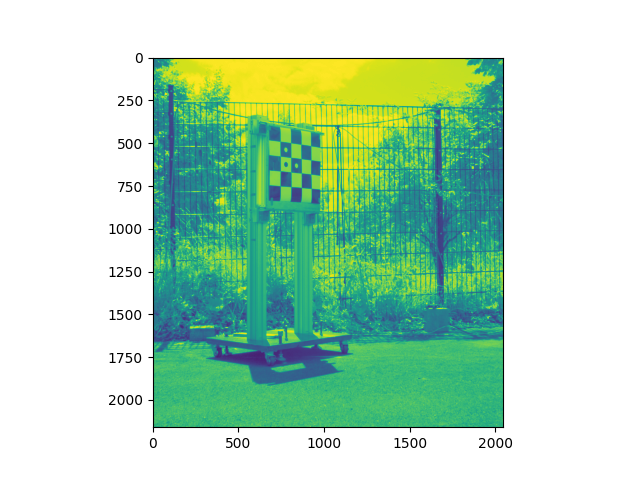

In [134]:
f, ax = plt.subplots()
ax.imshow(im_gray)

Use the tool below to select a bounding box for the grid.  
If `image_files` contains only one image, clicking it will close the interactive figure

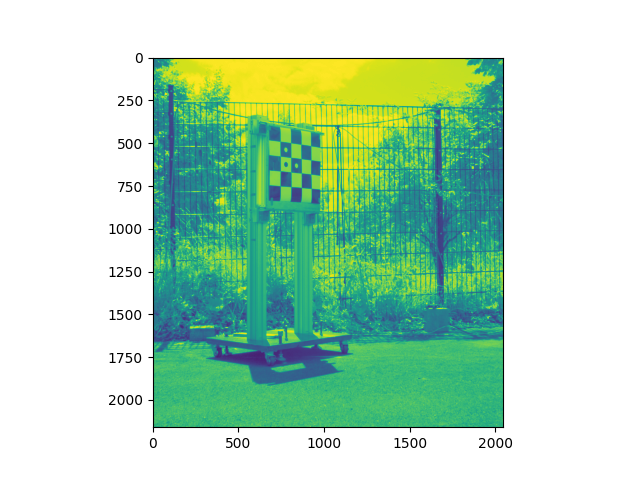

Button(description='Next Image', style=ButtonStyle())

In [135]:
%matplotlib widget
image_files = ["test_data/checker_test_001_21649.jpg","test_data/checker_test_001_21656.jpg", "test_data/checker_test_001_21657.jpg"]
annotator = ImageAnnotator(image_files)

button = widgets.Button(description="Next Image")
button.on_click(lambda b: annotator.next_image())
annotator.button = button  # Pass the button to the annotator
display(button)

In [124]:
print(annotator.bounding_boxes)

[ xmin: 1099.64015851702
 ymin: 1190.6807132076908
 widht:204.5454545454545
 heigth:233.76623376623365
,  xmin: 363.27652215338367
 ymin: 1330.940453467431
 widht:298.0519480519481
 heigth:391.5584415584415
,  xmin: 433.4063922832538
 ymin: 1073.7975963245738
 widht:303.8961038961038
 heigth:438.3116883116884
]


In [88]:
# bounding box of the calibration pattern, moved the pxs a bit for better results
x=590 + 78
y=360
x2= x + 320
y2= y + 540

In [89]:
# create a numpy slice object that allow us to index into the image mor readable
# opencv images are stored as y,x
roi = np.s_[y:y2,x:x2]

# Trying to use OpenCV

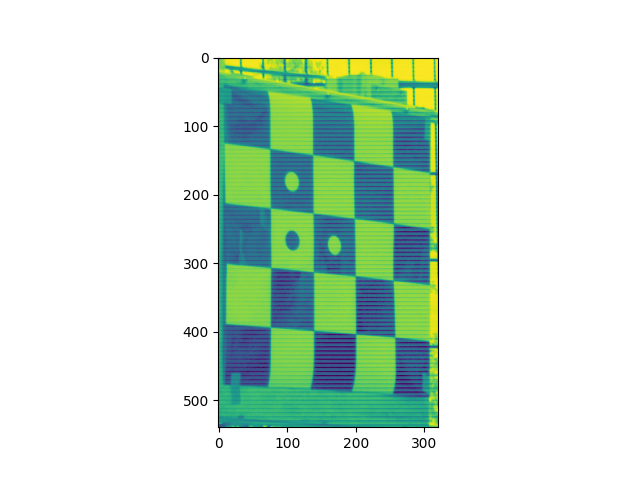

In [218]:
# select threshold from the roid
f,ax = plt.subplots()
ax.imshow(im_gray[roi])

In [219]:
# The corners in the thresholded image need to touch for the algorithm to work
# all below 95 -> black, all abovve white
thresh,bw_im = cv.threshold(im_gray,130, 255, cv.THRESH_BINARY)

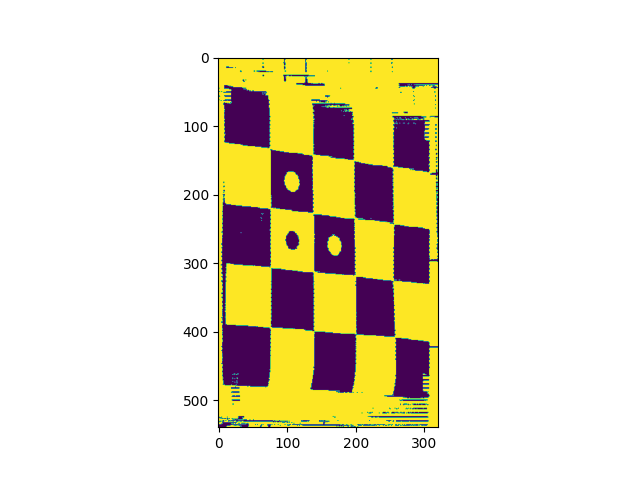

In [220]:
f,ax = plt.subplots()
ax.imshow(bw_im[roi])

In [221]:
# Find the chess board corners 
# If desired number of corners are 
# found in the image then ret = true 
ret, corners = cv.findChessboardCorners( 
                bw_im[roi], CHECKERBOARD, 
                cv.CALIB_CB_ADAPTIVE_THRESH  
                + cv.CALIB_CB_FAST_CHECK + 
                cv.CALIB_CB_NORMALIZE_IMAGE) 

In [222]:
ret

False

In [223]:
# We need 54 corners ( 6*9) for things to work
assert corners.shape[0] == 54

AttributeError: 'NoneType' object has no attribute 'shape'

In [224]:
rois_copy = np.copy(bw_im[roi])
image = cv.drawChessboardCorners(rois_copy,  
                                  CHECKERBOARD,  
                                  corners, ret) 

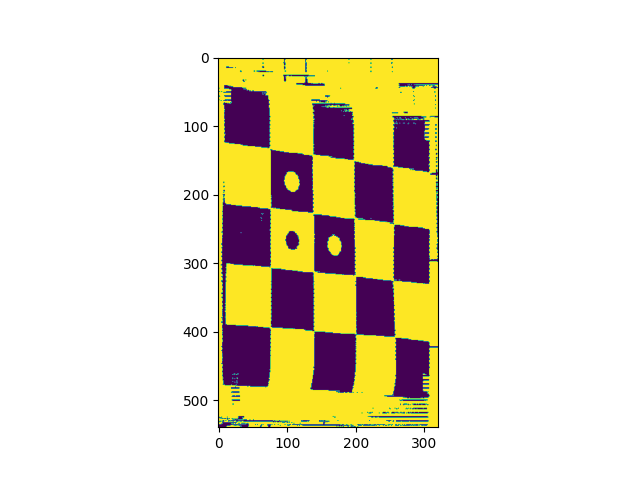

In [225]:
f,ax = plt.subplots()
ax.imshow(rois_copy)

In [226]:
# stop the iteration when specified 
# accuracy, epsilon, is reached or 
# specified number of iterations are completed. 
criteria = (cv.TERM_CRITERIA_EPS + 
            cv.TERM_CRITERIA_COUNT, 30, 0.001) 

In [227]:
help(cv.cornerSubPix)

Help on built-in function cornerSubPix:

cornerSubPix(...)
    cornerSubPix(image, corners, winSize, zeroZone, criteria) -> corners
    .   @brief Refines the corner locations.
    .
    .   The function iterates to find the sub-pixel accurate location of corners or radial saddle
    .   points as described in @cite forstner1987fast, and as shown on the figure below.
    .
    .   ![image](pics/cornersubpix.png)
    .
    .   Sub-pixel accurate corner locator is based on the observation that every vector from the center \f$q\f$
    .   to a point \f$p\f$ located within a neighborhood of \f$q\f$ is orthogonal to the image gradient at \f$p\f$
    .   subject to image and measurement noise. Consider the expression:
    .
    .   \f[\epsilon _i = {DI_{p_i}}^T  \cdot (q - p_i)\f]
    .
    .   where \f${DI_{p_i}}\f$ is an image gradient at one of the points \f$p_i\f$ in a neighborhood of \f$q\f$ . The
    .   value of \f$q\f$ is to be found so that \f$\epsilon_i\f$ is minimized. A system of

In [229]:
# If desired number of corners can be detected then, 
# refine the pixel coordinates and display 
# them on the images of checker board 


# Refining pixel coordinates a
# for given 2d points. 
rois_copy2 = np.copy(im_gray[roi])
corners2 = cv.cornerSubPix( 
    rois_copy2, corners, (5, 5), (-1, -1), criteria) 

# Draw and display the corners 
image = cv.drawChessboardCorners(rois_copy2,  
                                  CHECKERBOARD,  
                                  corners2, ret) 

f,ax = plt.subplots()

ax.imshow(rois_copy2)

# For our image gives this 

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\cornersubpix.cpp:58: error: (-215:Assertion failed) count >= 0 in function 'cv::cornerSubPix'


# Using an alternative implementation
see [here](https://github.com/lambdaloop/checkerboard)

In [230]:
pip install checkerboard

Note: you may need to restart the kernel to use updated packages.


In [231]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [232]:
from checkerboard import detect_checkerboard

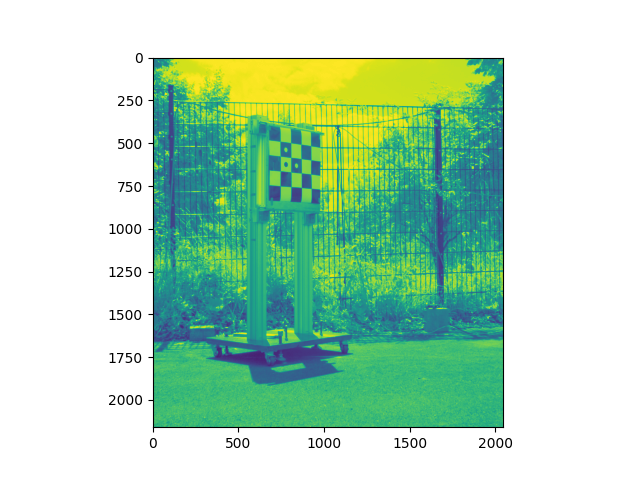

In [233]:
plt.imshow(im_gray)
plt.show()

In [234]:
rois_copy3 = np.copy(im_gray[roi])

In [235]:
corners3, score = detect_checkerboard(rois_copy3,CHECKERBOARD,winsize=20)

In [236]:
score

np.float64(0.04151858862860098)

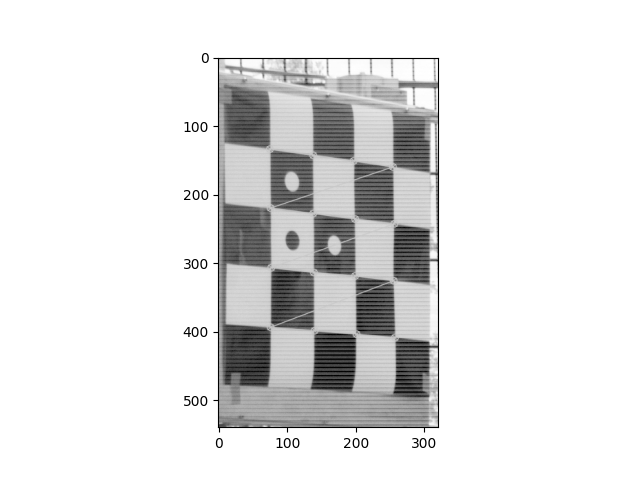

In [237]:
f,ax= plt.subplots()
image = cv.drawChessboardCorners(rois_copy3,  
                                  CHECKERBOARD,  
                                  corners3.astype(np.float32), True) 
ax.imshow(rois_copy3,cmap='grey')

We cropped the image to the bounding box of the board, but we want callibration in coordinates of the whole image. So we need to add the x and y offsets

In [238]:
corners3[0]

array([[ 75.32958003, 133.69789294]])

In [239]:
corners_in_image = corners3 + np.array([x,y])

Always check!

In [240]:
corners_in_image.shape

(16, 1, 2)

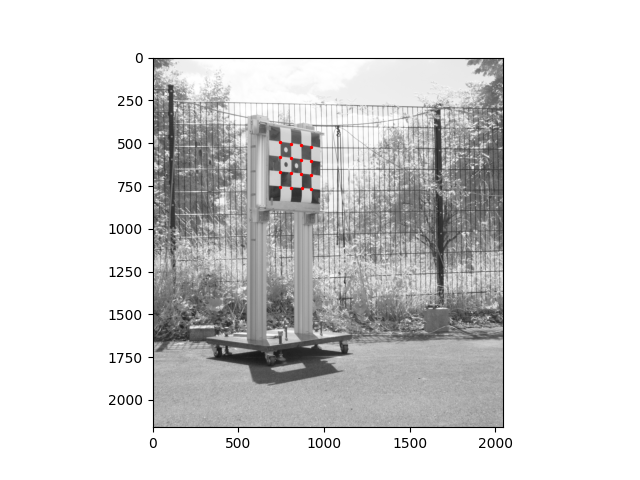

In [241]:
f,ax = plt.subplots()
ax.imshow(im_gray,cmap='grey')
ax.scatter(corners_in_image[:,0,0],corners_in_image[:,0,1],s=2,c='r')

# camera calibration

To calibrate a camera we need 2d and 3d points that correspond to each other.
The 2d points we get from the pattern detection.

The 3d points we just `define`

In [242]:
#  3D points real world coordinates, theses are the Checker Board Corners 
objectp3d = np.zeros(( CHECKERBOARD[0]  
                      * CHECKERBOARD[1],  
                      3), np.float32) 

In [243]:
objectp3d.shape

(16, 3)

In [244]:
for x in range(CHECKERBOARD[0]):
    for y in range(CHECKERBOARD[1]):
        objectp3d[CHECKERBOARD[1]*x+y,:2] = np.array([x,y])

In [245]:
objectp3d

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 2., 0.],
       [0., 3., 0.],
       [1., 0., 0.],
       [1., 1., 0.],
       [1., 2., 0.],
       [1., 3., 0.],
       [2., 0., 0.],
       [2., 1., 0.],
       [2., 2., 0.],
       [2., 3., 0.],
       [3., 0., 0.],
       [3., 1., 0.],
       [3., 2., 0.],
       [3., 3., 0.]], dtype=float32)

In [246]:
three_d_points = [objectp3d]
two_d_points = [corners_in_image.astype(np.float32)]

# Caveat

Be aware that `cornerSubPix` and `detect_checkerboard` return the points in different order. Since we want to match them to 3d points we need to be carefill

## detect_checkerboard

y direction first

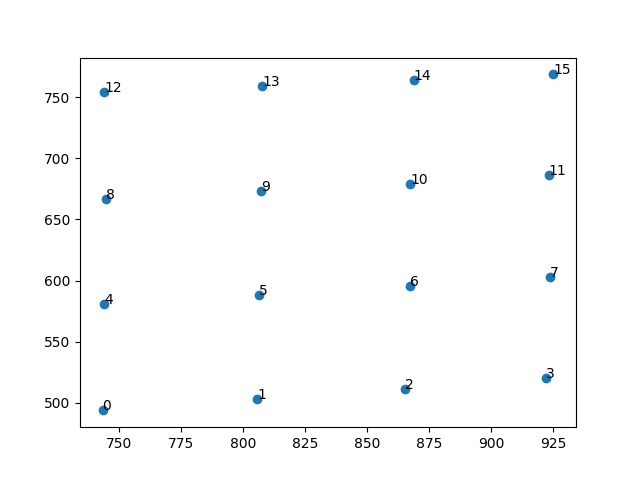

In [247]:
f,ax = plt.subplots()
ax.scatter(corners_in_image[:,0,0],corners_in_image[:,0,1])
for i,xy in enumerate(corners_in_image[:,0]):
    ax.text(xy[0],xy[1],str(i))

## cornerSubPix

x direction first

NameError: name 'corners2' is not defined

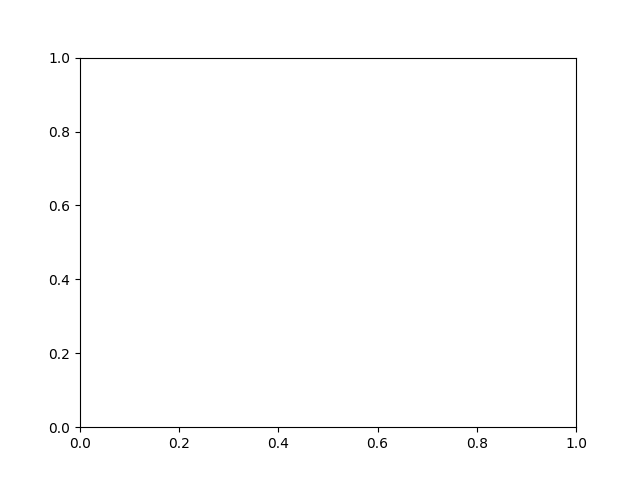

In [248]:
f,ax = plt.subplots()
ax.scatter(corners2[:,0,0],corners2[:,0,1])
for i,xy in enumerate(corners2[:,0]):
    ax.text(xy[0],xy[1],str(i))

In [249]:
help(cv.calibrateCamera)

Help on built-in function calibrateCamera:

calibrateCamera(...)
    calibrateCamera(objectPoints, imagePoints, imageSize, cameraMatrix, distCoeffs[, rvecs[, tvecs[, flags[, criteria]]]]) -> retval, cameraMatrix, distCoeffs, rvecs, tvecs
    .   @overload



In [250]:
ret, matrix, distortion, r_vecs, t_vecs = cv.calibrateCamera( 
    three_d_points, 
    two_d_points,
    im_gray.shape[::-1], # size of the image, since cs graphics its reversed from numpy, just a convention...
    None,
    None
    ) 

In [251]:
r_vecs

(array([[2.15282812],
        [2.15910308],
        [0.10865103]]),)

In [252]:
matrix

array([[5.39283037e+02, 0.00000000e+00, 1.05053709e+03],
       [0.00000000e+00, 8.62681310e+02, 1.04194842e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [253]:
reprojected_points, jacobian = cv.projectPoints(objectp3d,r_vecs[0], t_vecs[0],matrix,distortion)

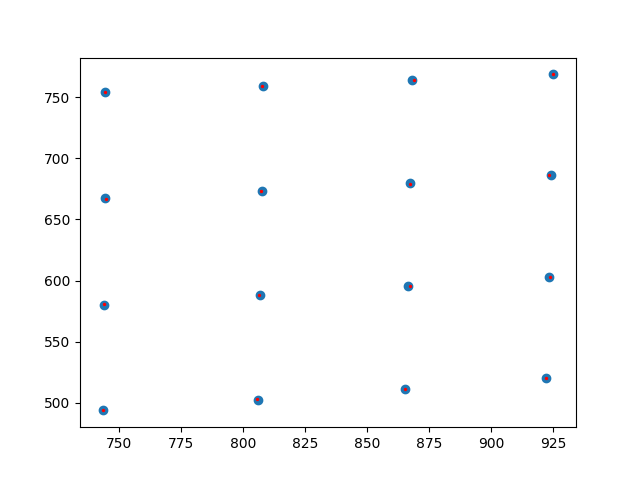

In [254]:
f,ax = plt.subplots()
ax.scatter(reprojected_points[:,0,0],reprojected_points[:,0,1])
ax.scatter(corners_in_image[:,0,0],corners_in_image[:,0,1],s=2,c='r')